# Prediction of House Prices
To predict the sale price of the house 

## Reading the Data

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

In [88]:
data= pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [89]:
data.shape

(1460, 81)

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## To find the number of Null values

In [91]:
find_null= pd.isnull(data).sum()
find_null[find_null>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Since Alley, PoolQC, Fence and MiscFeature has too many null values, we choose to drop them. Also we dont need the Id column for the model, hence we dop that as well.

In [92]:
data.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],inplace=True,axis=1)

In [93]:
Y=data[['SalePrice']]

In [94]:
data.drop(['SalePrice'],inplace=True,axis=1)

## Converting Strings to Float

In [95]:
data=pd.get_dummies(data)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


## Imputating Null values by the Median Values

In [96]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='most_frequent', axis=0)
data = imp.fit_transform(data)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [97]:
data

array([[6.000e+01, 6.500e+01, 8.450e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 8.000e+01, 9.600e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [6.000e+01, 6.800e+01, 1.125e+04, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [7.000e+01, 6.600e+01, 9.042e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 6.800e+01, 9.717e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+01, 7.500e+01, 9.937e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

## Log transformation

In [98]:
data = np.log(data)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


## Change -inf to 0 again

In [99]:
data[data==-np.inf]=0

## PCA

In [103]:
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(data)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.22421051, 0.40227814, 0.52596656, 0.62863801, 0.70150044,
       0.76077132, 0.81268873, 0.85679338, 0.88941298, 0.9198445 ,
       0.94553939, 0.95506589, 0.9641389 , 0.97217505, 0.97959301,
       0.98467641, 0.98879319, 0.99192101, 0.99392843, 0.9952653 ,
       0.99621772, 0.99704971, 0.99778375, 0.99846264, 0.99897294,
       0.99937421, 0.99961794, 0.99980127, 0.99988475, 0.99994181,
       0.99998632, 0.99999673, 0.99999876, 0.99999946, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [104]:
pca = PCA(n_components=36,whiten=True)
pca = pca.fit(data)
dataPCA = pd.DataFrame(pca.transform(data))

## Fitting on the Varoius Models

In [105]:
X= dataPCA
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

## Linear Regression

In [106]:
reg= LinearRegression()
reg=reg.fit(x_train,y_train)
print('Coeff: ',reg.coef_)
print('Intercept: ',reg.intercept_)

Coeff:  [[  -407.73868412  49413.90187178  12186.00908359  -4014.4085406
  -12683.32427392   1168.14553748   7412.2039998    -401.82714573
  -10568.28415568  -3444.61639734  -2673.08360814   4950.70057416
   10526.93963507  19029.38601392  -5452.87299264   -835.23684146
   22687.02602028  -6371.16029942 -12736.17352235  12928.06839186
   11005.49958298  14278.22557642  -3367.44283878  -7718.63744316
   -2437.19225752  -9743.55901346    645.86858149  -4001.42667572
     639.45291046  -1366.70136223   2815.11789661    285.97370163
   -7623.91364184    291.45031551  -1258.88518731   1154.86228566]]
Intercept:  [181178.85670733]


In [107]:
y_pred=reg.predict(x_test)

In [108]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
lin_r2= r2_score(y_test,y_pred)
print("Regressor Score =",lin_r2)

RMSE= 45926.27064035835
Regressor Score = 0.6945745497041393


Text(0.5, 1.0, 'Residual Plot')

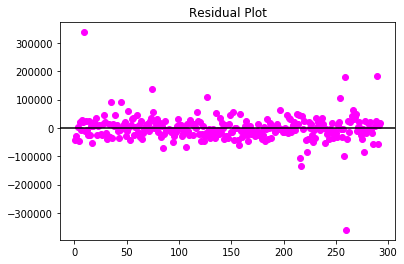

In [109]:
#Residual Plot

x=[i for i in range(1,len(y_pred)+1)]

x_plot= plt.scatter(x,(y_test-y_pred),color='magenta')
plt.axhline(y=0,color='black')  #plt.plot(x,[0]*len(y_pred),color='black')  
plt.title('Residual Plot')

## Ridge Regression

In [110]:
ridgeReg= Ridge(alpha=0.01, normalize=True)
ridgeReg.fit(x_train,y_train)
print('Ridge Regression Coeff: ',ridgeReg.coef_)
print('Ridge Regression Intercept: ',ridgeReg.intercept_)

Ridge Regression Coeff:  [[  -404.42882009  48909.21496863  12067.27331189  -3978.90502459
  -12546.00391031   1160.00457439   7319.98997325   -396.3848619
  -10459.98801641  -3411.67356157  -2659.88115856   4888.37137306
   10422.71264173  18827.25499853  -5393.45115139   -842.48215276
   22435.48596617  -6403.14480299 -12608.30237517  12798.96655239
   10889.04978648  14131.32350991  -3310.43844175  -7662.91356343
   -2418.69707842  -9634.5207108     637.30983692  -3961.7992136
     604.79342056  -1329.93631447   2782.1199177     269.96929197
   -7549.05390248    290.43324897  -1240.80785928   1156.57395443]]
Ridge Regression Intercept:  [181173.63864514]


In [111]:
y_pred=ridgeReg.predict(x_test)

In [112]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
ridge_r2= r2_score(y_test,y_pred)
print("Regressor Score =",ridge_r2)

RMSE= 45859.755591979934
Regressor Score = 0.6954586048178661


## Lasso Regression

In [113]:
lassoReg= Lasso(alpha=0.05, normalize= True)  
lassoReg.fit(x_train,y_train)
print('Lasso Regression Coeff: ',lassoReg.coef_)
print('Lasso Regression Intercept: ',lassoReg.intercept_)

Lasso Regression Coeff:  [  -406.0087109   49412.11705515  12184.0563204   -4012.8136663
 -12681.50826102   1166.56167656   7410.39794867   -400.10229372
 -10566.34943607  -3442.87188479  -2671.5604822    4949.03360301
  10525.26291992  19027.78430138  -5451.19130862   -833.65702453
  22685.24527079  -6369.91416955 -12734.39085823  12926.33374699
  11003.54056855  14276.40696516  -3365.51100621  -7717.11134906
  -2435.37520456  -9741.67470726    644.17641191  -3999.68065085
    637.50807795  -1364.7437882    2813.14448809    284.02041807
  -7622.15827629    289.45917309  -1257.05343598   1153.27108531]
Lasso Regression Intercept:  [181178.85580558]


In [114]:
y_pred=lassoReg.predict(x_test)

In [115]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
lasso_r2= r2_score(y_test,y_pred)
print("Regressor Score =",lasso_r2)

RMSE= 45925.689441212504
Regressor Score = 0.6945822800025129


## RandomForest Regressor

In [116]:
rfReg=RandomForestRegressor()
rfReg.fit(x_train,y_train)
y_pred= rfReg.predict(x_test)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [117]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
RF_r2= r2_score(y_test,y_pred)
print("Regressor Score =",RF_r2)

RMSE= 53513.83761581289
Regressor Score = 0.585318124300606


## AdaBoost Regressor

In [118]:
AdaBoostReg= AdaBoostRegressor()
AdaBoostReg.fit(x_train,y_train)
y_pred= AdaBoostReg.predict(x_test)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
Ada_r2= r2_score(y_test,y_pred)
print("Regressor Score =",Ada_r2)

RMSE= 57151.33761775475
Regressor Score = 0.5270277505992884


## Bagging Regressor

In [120]:
BagReg= BaggingRegressor()
BagReg.fit(x_train,y_train)
y_pred=BagReg.predict(x_test)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [121]:
rmse= np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
Bag_r2= r2_score(y_test,y_pred)
print("Regressor Score =",Bag_r2)

RMSE= 55682.27388004598
Regressor Score = 0.5510305551650051


## Model Comparison

In [122]:
Model_comparison=pd.DataFrame([lin_r2,ridge_r2,lasso_r2,RF_r2,Ada_r2,Bag_r2],['Linear','Ridge','Lasso','RandomForest','AdaBoost','Bagging'])
Model_comparison.columns=['Regressor Score']
Model_comparison

,Regressor Score
Linear,0.694575
Ridge,0.695459
Lasso,0.694582
RandomForest,0.585318
AdaBoost,0.527028
Bagging,0.551031


Text(0.5, 1.0, 'Model Comparison')

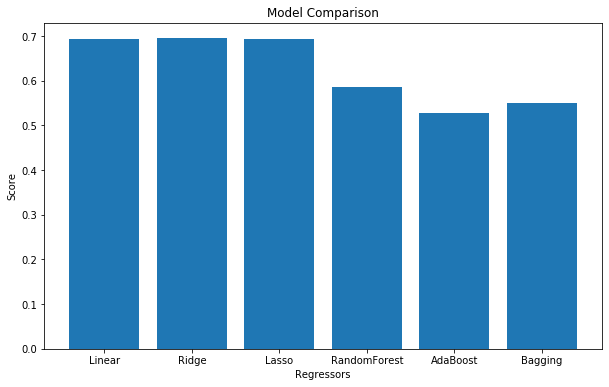

In [123]:
plt.figure(figsize=(10,6))
plt.bar(Model_comparison.index,Model_comparison['Regressor Score'])
plt.xlabel('Regressors')
plt.ylabel('Score')
plt.title('Model Comparison')

## Predicting for test

In [135]:
test=pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [125]:
test.drop(['Id'],axis=1,inplace=True)

In [126]:
find_null= pd.isnull(test).sum()
find_null[find_null>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

### Since Alley, PoolQC, Fence and MiscFeature has too many null values, we choose to drop them. Also we dont need the Id column for the model, hence we dop that as well.

In [127]:
test.drop(['Alley','PoolQC','Fence','MiscFeature'],inplace=True,axis=1)

## Converting Strings to Float

In [128]:
test=pd.get_dummies(test)
test.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0


## Imputating Null values by the Median Values

In [129]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='most_frequent', axis=0)
data1 = imp.fit_transform(test)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## Log transformation

In [130]:
data1 = np.log(data1)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


## Change -inf to 0 again

In [131]:
data1[data1==-np.inf]=0

In [132]:
pca = PCA(n_components=36,whiten=True)
pca = pca.fit(data1)
dataPCA1 = pd.DataFrame(pca.transform(data1))

## Prediction of Ridge Regression

In [133]:
test_pred=pd.DataFrame(ridgeReg.predict(dataPCA1))
test_pred.head()

,0
0,181537.562788
1,112001.810455
2,123669.963273
3,88942.554713
4,184862.859287


In [136]:
submission= pd.concat((test['Id'],test_pred),axis=1)
submission.set_index(['Id'],inplace=True)
submission.to_csv("Final_Submission.csv")